## Task: Predict Carbon Emissions Based on Satellite Observations

* You are provided with a time series satellite observations dataset extracted from Sentinel-5P satelite from 2019 to 2021.

* Your objective is to build a regression model that accurately predicts the amount of carbon emissions in the next years.

* Your target is the column: "emission".

* You are provided with the code to download and load the csv file.

* Your work will be evaluated based on the completion of the given tasks below.

* You are allowed to use any models or libraries you want.
    
---


In [158]:
import pandas as pd
import gdown
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np


In [140]:
path = kagglehub.dataset_download("mohammad2012191/q3-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohammad2012191/q3-data/versions/1


In [141]:
csv_path = os.path.join(path, "train.csv")

data = pd.read_csv(csv_path)
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# EDA & Preprocessing

1. Drop the ID feature (ID_LAT_LON_YEAR_WEEK):

In [142]:
# 1. TODO
data = data.drop("ID_LAT_LON_YEAR_WEEK" , axis = 1)

2. Check for the missing values and handle them.


In [143]:
# 2. TODO
data = data.fillna(data.mean())# handing the missing values with imputed (mean)


3. Plot the "emission" histogram.

(array([7.6872e+04, 1.8310e+03, 1.0800e+02, 2.5000e+01, 1.0000e+00,
        1.0000e+01, 5.9000e+01, 9.0000e+01, 8.0000e+00, 1.9000e+01]),
 array([   0.    ,  316.7768,  633.5536,  950.3304, 1267.1072, 1583.884 ,
        1900.6608, 2217.4376, 2534.2144, 2850.9912, 3167.768 ]),
 <BarContainer object of 10 artists>)

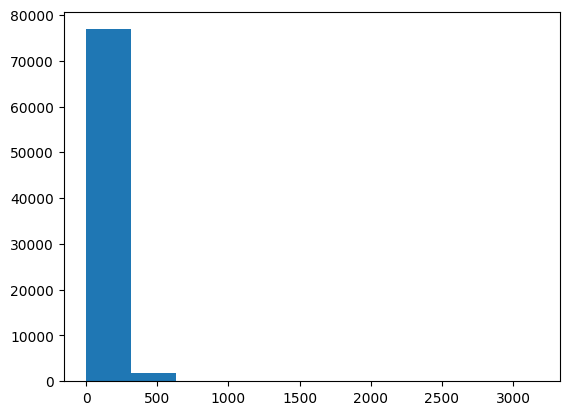

In [144]:
# 3. TODO
plt.hist(data['emission'])


4. Plot the "latitude" and "longitude" using a scatter plot then colorize the points using the "emission" column.

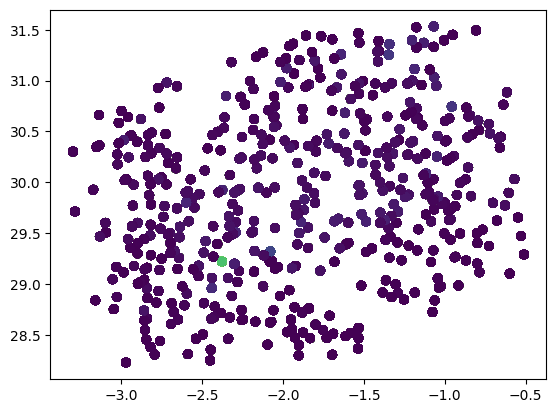

In [145]:
# 4. TODO#
plt.scatter(data['latitude'] , data['longitude'] , c = data['emission'])

# Feature engineering

1. Add a new feature representing "Location" (To do that, you should convert "longitude" and "latitude" features to string type, concatenate them and add the result as a new feature).

In [146]:
# 1. TODO
data['Location'] = data['longitude'].astype(str) + data['latitude'].astype(str)
data

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,29.29-0.51
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,29.29-0.51
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,29.29-0.51
3,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,29.29-0.51
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,29.29-0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,30.301-3.299
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,30.301-3.299
79020,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,30.301-3.299
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,30.301-3.299


2. Add one aggregation feature representing the average emissions per location (You should groupby "Location" feature and take mean of the "emission", then merge the result to the data)

In [147]:
# 2. TODO
data_aggr = data.groupby('Location').agg({
    'emission' : ['mean']
})
data_aggr.columns =['Avg emission per location']
data_aggr
data = data.merge(data_aggr, on = 'Location',how = 'left')
data

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,Avg emission per location
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,29.29-0.51,4.272966
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,29.29-0.51,4.272966
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,29.29-0.51,4.272966
3,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,29.29-0.51,4.272966
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,29.29-0.51,4.272966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,30.301-3.299,27.633301
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,30.301-3.299,27.633301
79020,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,30.301-3.299,27.633301
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,30.301-3.299,27.633301


3. Use Label encoder to encode all the categorical features

In [148]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = data.select_dtypes(include=["object"]).columns

data['Location'] = label_encoder.fit_transform(data['Location'])


# Modeling

### Baseline:

1. Create a baseline using the "emission" median and calculate MAE score.

In [149]:
# 1. TODO
from sklearn.metrics import mean_absolute_error

baseline = np.full_like(data['emission'], data['emission'].median())

MAE = mean_absolute_error(data['emission'] , baseline)

2. Perform a Time-Based Train-Test Split:
  * You will use the "year" column to split data manually using pandas.
  * Use all samples from 2019 and 2020 as the training set.
  * Use all samples from 2021 as the validation set.
  * Construct X_train, X_valid, y_train, y_valid

In [160]:
# 2. TODO
from sklearn.model_selection import train_test_split

dataVal = data[data['year'] == 2021]
dataTrain = data[data['year']<2021]

X = dataTrain.drop("year", axis = 1)
y = dataTrain["year"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)


3. Train a LGBMRegressor on the training data.

In [162]:
# 3. TODO
import lightgbm as lgb

gbm = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=20)
gbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric="l1", callbacks=[lgb.early_stopping(5)])



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17386
[LightGBM] [Info] Number of data points in the train set: 36877, number of used features: 69
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2019.498197
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.242641	valid_0's l2: 0.0669528


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(learning_rate=0.05, n_estimators=20)

4. Evaluate the Model on the validation data Using MAE

In [166]:
# 4. TODO
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration_)
MAE = mean_absolute_error(y_valid, y_pred) ** 0.5
MAE

0.49258612413746533

5. Plot the features importance of your model.

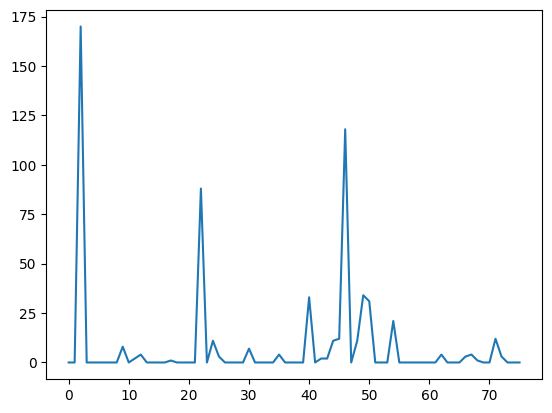

In [170]:
# 5. TODO
plt.plot(list(gbm.feature_importances_))

6. Plot the validation predictions using a histogram.

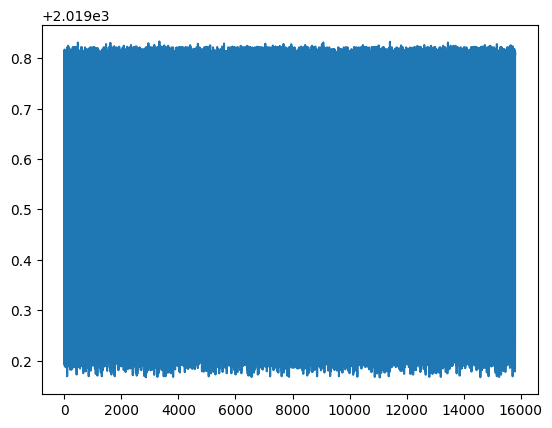

In [171]:
# 6. TODO
plt.plot(y_pred)

Good luck in the exam x)

Prepared by: Mohamed Eltayeb
